# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [80]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

In [81]:
#create file paths to csv's

mouse_csv_to_load = Path("data/Mouse_metadata.csv")
study_results_csv_to_load = Path("data/Study_results.csv")

#read csv files into a DataFrame

mouse_metadata = pd.read_csv(mouse_csv_to_load)
study_results = pd.read_csv(study_results_csv_to_load)




In [82]:
# Checking the number of mice.
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [83]:

study_results.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [84]:
mouse_metadata.nunique()

Mouse ID        249
Drug Regimen     10
Sex               2
Age_months       24
Weight (g)       16
dtype: int64

In [85]:
study_results.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [86]:
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [87]:
# Checking for number of mice

number_of_mice = combined_df['Mouse ID'].nunique()
print(f"There are {number_of_mice} mice in this study")

There are 249 mice in this study


In [88]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

grouped_counts = combined_df.groupby(['Mouse ID', 'Timepoint']).size() #using the .size() to count the number of groups 

# Filter for groups with more than one occurrence (i.e., duplicates)
duplicate_mice_timepoint = grouped_counts[grouped_counts > 1].index.get_level_values('Mouse ID').unique() #index.get_level_values allows us to pull the indexes and the respective valueves of the duplicates
duplicate_mice_timepoint.values



array(['g989'], dtype=object)

In [89]:
duplicate_mice = combined_df[combined_df['Mouse ID'].isin(duplicate_mice_timepoint)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


### Alternative method to get the duplicate mice values

In [90]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [91]:
#selcet only the first instance on the duplicate mouse id
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID','Timepoint'], keep='first')]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [92]:
cleaned_df = combined_df.loc[combined_df['Mouse ID'] != 'g989']
cleaned_df.reset_index()
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [93]:
no_duplicate_mice_count = cleaned_df['Mouse ID'].nunique()
print(f"There are {no_duplicate_mice_count} mice excluding the duplicates")

There are 248 mice excluding the duplicates


# Summary Statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    ## groupby standard of the mean 
drug_group = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
avg_drug = drug_group.mean()
median_drug= drug_group.median()
var_drug = drug_group.var()
sem_drug = drug_group.sem()
# Assemble the resulting series into a single summary DataFrame.

summary_stats_df = pd.DataFrame ({
    'Mean':avg_drug,
    'Median': median_drug,
    'Variance': var_drug,
    'SEM': sem_drug
})

summary_stats_df

,Mean,Median,Variance,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


### more advanced method to generate Summary Stats

In [95]:
summary_stats = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'sem'])
summary_stats

,mean,median,var,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,0.581331
Propriva,52.320930,50.446266,43.852013,0.544332
Ramicane,40.216745,40.673236,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,0.573111


# Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observabed Mouse Timepoints'>

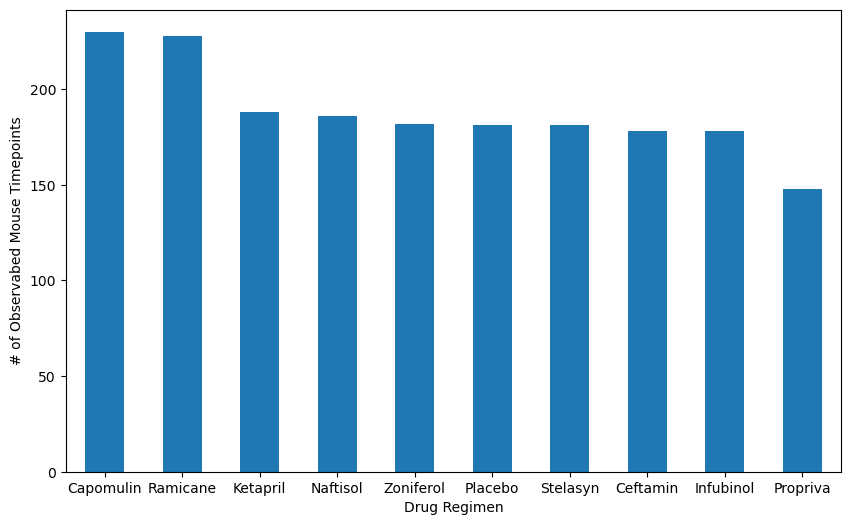

In [96]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
count_by_drug = cleaned_df.groupby(['Drug Regimen']).size()
count_by_drug = count_by_drug.sort_values(ascending=False)
count_by_drug.plot(
    kind='bar',
    figsize=(10,6),
    rot=0,
    xlabel= 'Drug Regimen',
    ylabel='# of Observabed Mouse Timepoints'
)

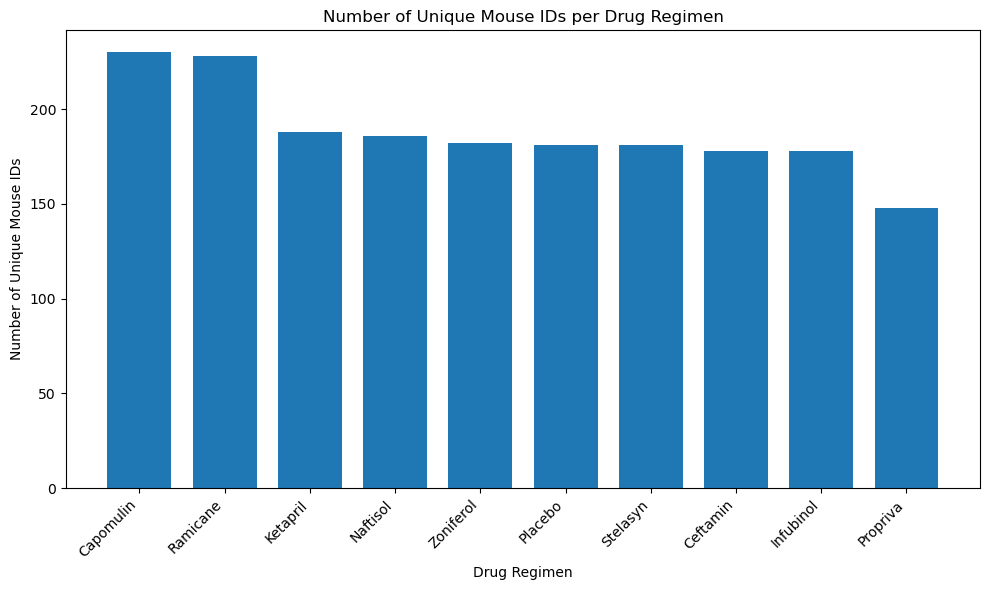

In [97]:
# Use pyplot to generate the bar graph

# Create a bar chart using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(count_by_drug.index, count_by_drug, width=0.75)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Unique Mouse IDs')
plt.title('Number of Unique Mouse IDs per Drug Regimen')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Distribution of Mice by Gender'}, ylabel='Sex'>

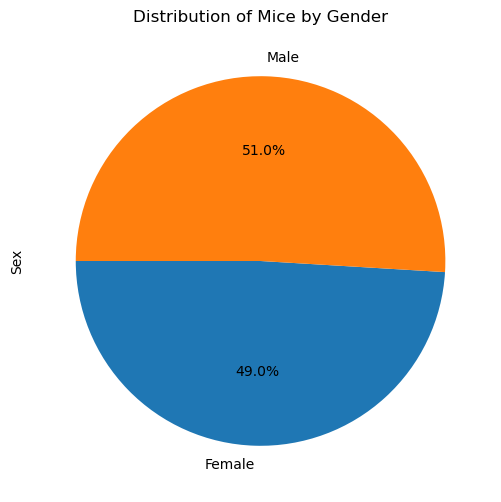

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = cleaned_df.groupby(['Sex'])['Mouse ID'].size()
mice_gender.sort_values(ascending=True)
mice_gender.plot.pie(
    figsize=(6, 6), 
    autopct='%1.1f%%', 
    startangle=180, 
    title='Distribution of Mice by Gender', 
    ylabel='Sex'
    )



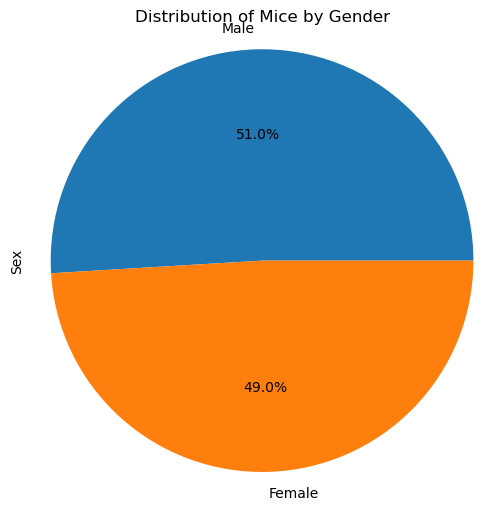

In [99]:
# Generate the pie chart using pyplot

mice_by_gender = cleaned_df['Sex'].value_counts()

# Create a pie chart with specific colors
plt.figure(figsize=(6, 6))
plt.pie(
    mice_by_gender, 
    labels=mice_by_gender.index, 
    autopct='%1.1f%%', 
    startangle=0
    )
plt.title('Distribution of Mice by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('Sex')
plt.show()

# Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
 #groupby mouse id 
 #find the max of this groupby 
    

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
    #merge max groupby and complete dataframe  on mouse id and timepoitn
        #

In [101]:
#final_tumor_size = cleaned_df.groupby(['Mouse ID','Timepoint'])['Tumor Volume (mm3)'].value_counts()
#final_tumor_size

Mouse ID  Timepoint  Tumor Volume (mm3)
a203      0          45.000000             1
          5          48.508468             1
          10         51.852437             1
          15         52.777870             1
          20         55.173336             1
                                          ..
z969      25         63.145652             1
          30         65.841013             1
          35         69.176246             1
          40         70.314904             1
          45         73.867845             1
Name: Tumor Volume (mm3), Length: 1880, dtype: int64

In [102]:
final_tumor_size = cleaned_df.groupby(['Mouse ID'])
final_tumor_size

timepoint_max = final_tumor_size['Timepoint'].max()
timepoint_max

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [103]:

cleaned_df

time_max_merged = pd.merge(timepoint_max, cleaned_df, on=['Mouse ID','Timepoint'], how='left')
time_max_merged

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
    # creating a list of drug treat 
    #for loop to calc the IQR for each of the drugs 
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds